In [65]:
import numpy as np
np.random.seed(2017)

import os
import time
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.models import load_model
import tkinter as tk
from tkinter import filedialog

import os
import itertools
import shutil
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Reshape, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd 
from glob import glob
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
import cv2

2.7.0


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
# os.chdir('E:\OculoGuard_Mobile_app-main\Backend\Model\Data')
# if os.path.isdir('\Data') is False: 
#     os.mkdir('train')
# #     os.mkdir('valid')
#     os.mkdir('test')
#     filenames = ["dr_Mild", "dr_Moderate", "dr_Proliferate","Normal",
#                 "dr_Severe","Glaucoma_Positive","Macular_Edema"]
#     for i in filenames:
#         shutil.move(f'{i}', 'train')
# #         os.mkdir(f'valid/{i}')
#         os.mkdir(f'test/{i}')

# #         valid_samples = random.sample(os.listdir(f'train/{i}'), int(len(os.listdir(f'train/{i}'))*0.2))
# #         for j in valid_samples:
# #             shutil.move(f'train/{i}/{j}', f'valid/{i}')

#         test_samples = random.sample(os.listdir(f'train/{i}'), int(len(os.listdir(f'train/{i}'))*0.3))
#         for k in test_samples:
#             shutil.move(f'train/{i}/{k}', f'test/{i}')
# os.chdir('..')

In [4]:
train_path = 'E:/OculoGuard_Mobile_app-main/Backend/Model 01/Data/train'
test_path = 'E:/OculoGuard_Mobile_app-main/Backend/Model 01/Data/test'

# train_batches = ImageDataGenerator(
#                                   preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
#                                   rotation_range=10, 
#                                   width_shift_range=0.1, 
#                                   height_shift_range=0.1, 
#                                   shear_range=0.15, 
#                                   zoom_range=0.1, 
#                                   channel_shift_range=10., 
#                                   horizontal_flip=True
#                                   ).flow_from_directory(
#                                                        directory=train_path, 
#                                                        target_size=(224,224),
#                                                        batch_size=16
#                                                       )

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=1000 )

# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
#     directory=valid_path, target_size=(224,224), batch_size=795 )
    
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=1000 , shuffle=False)

Found 2919 images belonging to 7 classes.
Found 1246 images belonging to 7 classes.


In [5]:
train_batches.class_indices

{'Glaucoma_Positive': 0,
 'Macular_Edema': 1,
 'Normal': 2,
 'dr_Mild': 3,
 'dr_Moderate': 4,
 'dr_Proliferate': 5,
 'dr_Severe': 6}

In [6]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()
print(len(mobile.layers))

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [27]:
x = mobile.layers[-6].output
tf.random.set_seed(1435)
GVP =  tf.keras.layers.GlobalAveragePooling2D()(x)
output = Dense(units=7, activation='softmax')(GVP)

model_1 = Model(inputs=mobile.input, outputs=output)

model_2 = Model(inputs=mobile.input, outputs=output)

for layer in model_1.layers[:-23]:
    layer.trainable = False

for layer in model_2.layers[:-23]:
    layer.trainable = False
    
model_1.summary() 
print(len(model_1.layers))

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [56]:
#        Train with the Noised set and noised validation and Test

model_1.compile(optimizer=Adam(lr=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
tf.random.set_seed(1435)
history = model_1.fit(
    train_batches, 
    epochs=15, 
    steps_per_epoch=len(train_batches), 
    validation_data = test_batches,
    verbose = 1,
    validation_steps=len(test_batches))

model_1.save('models/model.h5')

c:\users\imesh\appdata\local\programs\python\python38\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 30s 12s/step - loss: 0.0249 - accuracy: 0.9897 - val_loss: 1.0450 - val_accuracy: 0.8058
Epoch 2/15
3/3 [==============================] - 22s 8s/step - loss: 0.0218 - accuracy: 0.9901 - val_loss: 1.0993 - val_accuracy: 0.8066
Epoch 3/15
3/3 [==============================] - 23s 8s/step - loss: 0.0162 - accuracy: 0.9914 - val_loss: 1.0430 - val_accuracy: 0.8042
Epoch 4/15
3/3 [==============================] - 22s 8s/step - loss: 0.0184 - accuracy: 0.9921 - val_loss: 0.9480 - val_accuracy: 0.8194
Epoch 5/15
3/3 [==============================] - 23s 9s/step - loss: 0.0157 - accuracy: 0.9918 - val_loss: 0.9406 - val_accuracy: 0.8202
Epoch 6/15
3/3 [==============================] - 23s 8s/step - loss: 0.0140 - accuracy: 0.9928 - val_loss: 0.9639 - val_accuracy: 0.8170
Epoch 7/15
3/3 [==============================] - 23s 9s/step - loss: 0.0142 - accuracy: 0.9925 - val_loss: 0.9762 - val_accuracy: 0.8226
Epoch 8/15
3/3 [=================

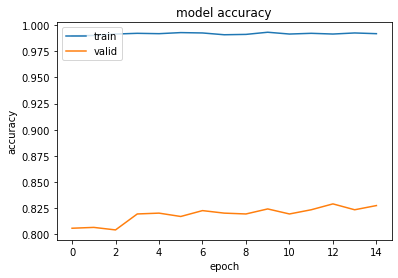

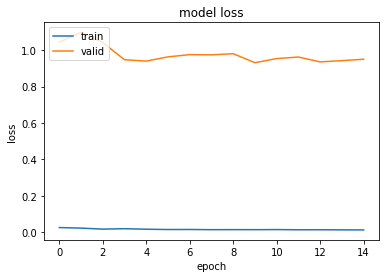

In [57]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [58]:
#model = load_model('models/model.h5')

test_labels = test_batches.classes
predictions = model_1.predict(x=test_batches, steps=len(test_batches), verbose=1)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

2/2 [==============================] - 7s 403ms/step


In [59]:
train_batches.class_indices

{'Glaucoma_Positive': 0,
 'Macular_Edema': 1,
 'Normal': 2,
 'dr_Mild': 3,
 'dr_Moderate': 4,
 'dr_Proliferate': 5,
 'dr_Severe': 6}

In [60]:
y_pred_bool = np.argmax(predictions, axis=1)

print(classification_report(test_labels, y_pred_bool))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.93      0.96       100
           2       0.95      0.99      0.97       541
           3       0.66      0.59      0.62       111
           4       0.65      0.89      0.75       299
           5       0.68      0.17      0.27        88
           6       0.73      0.14      0.24        57

    accuracy                           0.83      1246
   macro avg       0.81      0.67      0.69      1246
weighted avg       0.83      0.83      0.80      1246



Confusion matrix, without normalization
[[ 50   0   0   0   0   0   0]
 [  0  93   3   1   3   0   0]
 [  0   0 533   5   3   0   0]
 [  0   0  10  65  36   0   0]
 [  0   0  12  17 267   3   0]
 [  0   0   2   7  61  15   3]
 [  0   0   0   3  42   4   8]]


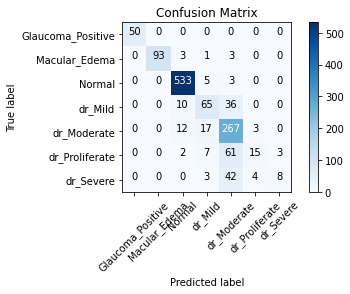

In [61]:
test_batches.class_indices

cm_plot_labels = [i for i in train_batches.class_indices]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

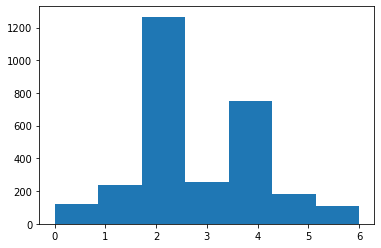

In [64]:
plt.hist(y_pred_bool, bins = 7)
plt.show()